In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'


In [3]:
MTOT = 21.5513
MDISK = 0.3 * 0.007747 * MTOT
MGAS = 0.7 * 0.007747 * MTOT
MHALO = MTOT - MDISK - MGAS

In [4]:
mhalo = 8 * 3.75E4 / 1E10
mbar = 8 * 7.5E3 / 1E10

NHALO = MHALO/mhalo
NDISK = MDISK/mbar
NGAS = MGAS/mbar

print('NHALO=', NHALO)
print('NDISK=', NDISK)
print('NGAS=', NGAS)

NHALO= 712811.40263
NDISK= 8347.896055000001
NGAS= 19478.424128333332


In [5]:
target_scale_length = 0.983264

In [6]:
mhalo = 3.75E4 / 1E10
mbar = 7.5E3 / 1E10

NHALO = MHALO/mhalo
NDISK = MDISK/mbar
NGAS = MGAS/mbar

print('NHALO=', NHALO)
print('NDISK=', NDISK)
print('NGAS=', NGAS)

NHALO= 5702491.22104
NDISK= 66783.16844000001
NGAS= 155827.39302666666


### SFH

In [7]:
def bin_sfr(t, sfr, bin_width=0.01):
    bin_left = 0.0
    bin_right = bin_left + bin_width
    
    ave_sfr = []
    ave_t = []
    
    max_val = np.max(t)
    while bin_left < max_val:
        key = np.logical_and(t >=bin_left, t<bin_right)
        ave_sfr.append(np.mean(sfr[key]))
        ave_t.append(np.mean(t[key]))
        
        bin_left += bin_width
        bin_right += bin_width
        
    return np.array(ave_t), np.array(ave_sfr)

(0.0, 5.0)

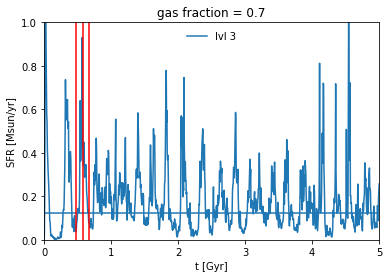

In [9]:
bin_width = 0.005

# sfh_file = np.genfromtxt(basepath+'runs/GSE2iso_fg0.7/lvl4/output/sfr.txt')
# time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2], bin_width=bin_width)
# plt.plot(time, sfr, label='lvl 4')

# key = np.logical_and(sfh_file[:,0] > 0.5, sfh_file[:,0] < 1)
# preint(np.mean(sfh_file[:,2][key]))

sfh_file_l3 = np.genfromtxt(basepath+'runs/GSE2iso_fg0.7/lvl3/output/sfr.txt')
time_l3, sfr_l3 = bin_sfr(sfh_file_l3[:,0], sfh_file_l3[:,2], bin_width=bin_width)
plt.plot(time_l3, sfr_l3, label='lvl 3')

# sfh_file_l2 = np.genfromtxt(basepath+'runs/MW3iso_fg0.7/lvl2/output/sfr.txt')
# time_l2, sfr_l2 = bin_sfr(sfh_file_l2[:,0], sfh_file_l2[:,2], bin_width=bin_width)
# plt.plot(time_l2, sfr_l2, label='lvl 2')

plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.title('gas fraction = 0.7')
# plt.axhline(10, c='k', ls='dashed')
# plt.axhline(15, c='k', ls='dashed')
plt.axhline(5E8/4E9)

plt.axvline(115*0.005, c='r')
plt.axvline(95*0.005, c='r')
plt.axvline(135*0.005, c='r')


plt.ylim(0, 1.0)
plt.xlim(0, 5)

In [42]:
sn = {}
for i in [95, 115, 135]:
    sn[i] = arepo.Snapshot(basepath + 'runs/GSE2iso_fg0.7/lvl'+str(3)+'/output', i, combineFiles=True)
    print(np.sum(sn[i].sfr.value))

0.042696368
0.69782346
0.09075393


### gas in GSE

In [6]:
sn_tev = {}
for i in [95, 115, 135]:
    sn_tev[i] = arepo.Snapshot(basepath + 'runs/GSE2iso_fg0.7/lvl'+str(3)+'/output', i, combineFiles=True)

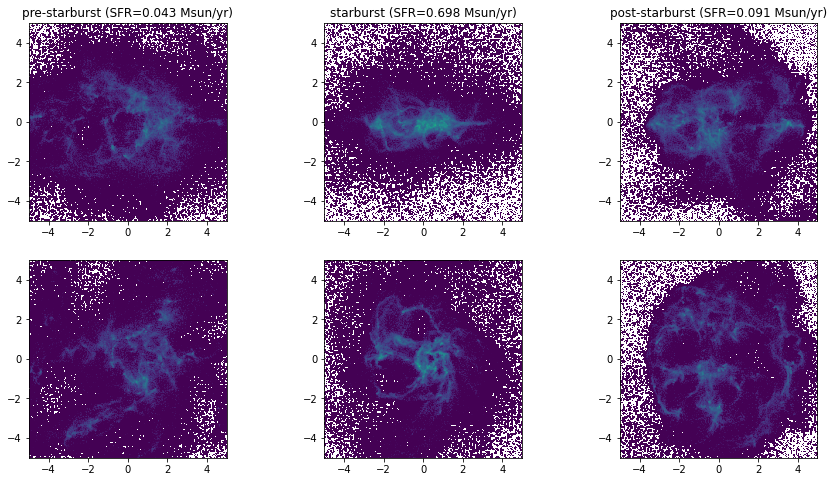

In [13]:
lvl = 3
nres = 256
range_xy = [[-5, 5], [-5, 5]]
vmin=1E-3
vmax=10.**(0.5)
extent = [range_xy[0][0], range_xy[0][1], range_xy[1][0], range_xy[1][1]]

dx = (range_xy[0][1] - range_xy[0][0])/nres
dy = (range_xy[1][1] - range_xy[1][0])/nres
surf = dx * dy

fig, ax = plt.subplots(2, 3, figsize=(15, 8))

sn = sn_tev[95]
x = sn.part0.pos[:,0].value - sn.BoxSize.value/2.
y = sn.part0.pos[:,2].value - sn.BoxSize.value/2.
mass = sn.part0.mass
hmap, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass/surf)
im = ax[0][0].imshow(hmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
ax[0][0].set_title('pre-starburst (SFR=0.043 Msun/yr)')

x = sn.part0.pos[:,0].value - sn.BoxSize.value/2.
y = sn.part0.pos[:,1].value - sn.BoxSize.value/2.
mass = sn.part0.mass
hmap, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass/surf)
im = ax[1][0].imshow(hmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))

sn = sn_tev[115]
x = sn.part0.pos[:,0].value - sn.BoxSize.value/2.
y = sn.part0.pos[:,2].value - sn.BoxSize.value/2.
mass = sn.part0.mass
hmap, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass/surf)
im = ax[0][1].imshow(hmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
ax[0][1].set_title('starburst (SFR=0.698 Msun/yr)')

x = sn.part0.pos[:,0].value - sn.BoxSize.value/2.
y = sn.part0.pos[:,1].value - sn.BoxSize.value/2.
mass = sn.part0.mass
hmap, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass/surf)
im = ax[1][1].imshow(hmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))

sn = sn_tev[135]
x = sn.part0.pos[:,0].value - sn.BoxSize.value/2.
y = sn.part0.pos[:,2].value - sn.BoxSize.value/2.
mass = sn.part0.mass
hmap, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass/surf)
im = ax[0][2].imshow(hmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
ax[0][2].set_title('post-starburst (SFR=0.091 Msun/yr)')

x = sn.part0.pos[:,0].value - sn.BoxSize.value/2.
y = sn.part0.pos[:,1].value - sn.BoxSize.value/2.
mass = sn.part0.mass
hmap, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass/surf)
im = ax[1][2].imshow(hmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))

### Kennicutt schmidt plot

In [14]:
def compute_KS(sn, dR=0.5):

    center = sn.part1.pos.value[np.argmin(sn.part1.pot)]
    pos = sn.part0.pos.value - center
    sfr = sn.part0.sfr
    mass = sn.part0.mass.value * sn.part0.MolecularHFrac

    Sigma_gas, _, _, _ = binned_statistic_2d(pos[:,0], pos[:,1], 1E10*mass, 
                                             statistic='sum', bins=np.arange(-8, 8, dR))
    Sigma_gas /= (1000*dR)**2

    Sigma_sfr, _, _, _ = binned_statistic_2d(pos[:,0], pos[:,1], sfr, 
                                             statistic='sum', bins=np.arange(-8, 8, dR))
    Sigma_sfr /= dR**2

    Sigma_gas = Sigma_gas.flatten()
    Sigma_sfr = Sigma_sfr.flatten()
    
    return Sigma_gas, Sigma_sfr
    

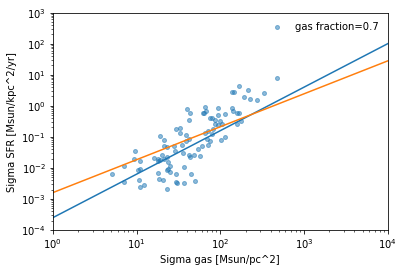

In [17]:
Sigma_gas_fid, Sigma_sfr_fid = compute_KS(sn_tev[115], dR=0.1)
# Sigma_gas_lim1, Sigma_sfr_lim1 = compute_KS(sn_lim1[lvl], dR=0.1)
# Sigma_gas_lim2, Sigma_sfr_lim2 = compute_KS(sn_lim2[lvl], dR=0.1)

key = np.random.choice(len(Sigma_gas_fid.flatten()), len(Sigma_gas_fid.flatten())//2, replace=False)

plt.scatter(Sigma_gas_fid.flatten()[key], Sigma_sfr_fid.flatten()[key], label='gas fraction=0.7', alpha=0.5, s=16)
# plt.scatter(Sigma_gas_lim1.flatten()[key], Sigma_sfr_lim1.flatten()[key], label='lim=1kpc', alpha=0.5, s=16)
# plt.scatter(Sigma_gas_lim2.flatten()[key], Sigma_sfr_lim2.flatten()[key], label='lim=2kpc', alpha=0.5, s=16)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 1E4)
plt.ylim(1E-4, 1E3)

xKS = np.linspace(1, 1E4, 10000)
yKS = 2.5E-4 * xKS**1.4
yKS2 = 16E-4 * xKS**1.06
plt.plot(xKS, yKS)
plt.plot(xKS, yKS2)
plt.xlabel('Sigma gas [Msun/pc^2]')
plt.ylabel('Sigma SFR [Msun/kpc^2/yr]')
plt.legend(frameon=False)


### Phase diagram

In [18]:
def compute_T(sn):
    u = sn.part0.InternalEnergy.value
    xe = sn.part0.ElectronAbundance
    
    gamma=5/3
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    kB = 1.381E-16
    
    T = (gamma - 1.) * (u/kB) * 1E10 * mu
    return T

def compute_n(sn):
    rho = np.copy(sn.part0.Density.value)
    xe  = sn.part0.ElectronAbundance
    # print(rho[rho>0])
    
    #convert rho to cgs
    UnitMass   = sn.parameters.UnitMass_in_g
    UnitLength = sn.parameters.UnitLength_in_cm
    rho *= UnitMass/UnitLength**3
    # print(UnitMass/UnitLength**3)
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    # print(np.median(mu))
    # print(np.where(np.isnan(rho[rho>0]))[0])
    # print(rho[:10])
    
    n = rho / mu
    
    return n
    

In [21]:
lvl=2

T95 = compute_T(sn_tev[95])
n95 = compute_n(sn_tev[95])
m95 = sn_tev[95].part0.mass.value

T115 = compute_T(sn_tev[115])
n115 = compute_n(sn_tev[115])
m115 = sn_tev[115].part0.mass.value


T135 = compute_T(sn_tev[135])
n135 = compute_n(sn_tev[135])
m135 = sn_tev[135].part0.mass.value

[Text(0.5, 0, 'log n [cm^-3]'), Text(0, 0.5, 'log T [K]')]

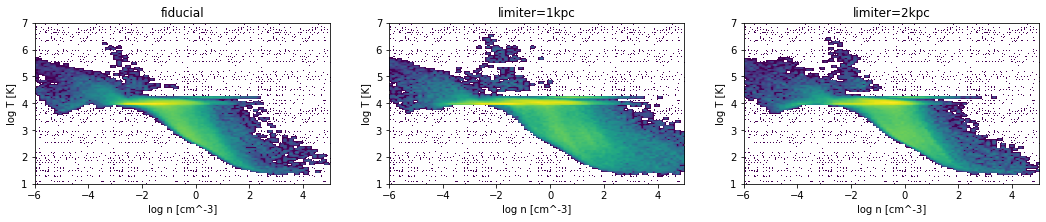

In [23]:
rng = [[-6, 5], [1, 7]]

fig, ax = plt.subplots(1, 3, figsize=(18, 4))

# ---- #

m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n95), np.log10(T95), m95, 
                                                  statistic='sum', bins=100, range=rng)
extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

ax[0].imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax[0].set(xlim=(-6, 5), ylim=(1, 7), title='fiducial')
ax[0].set(xlabel='log n [cm^-3]', ylabel='log T [K]')

# ---- #

m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n115), np.log10(T115), m115, 
                                                  statistic='sum', bins=100, range=rng)
extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

ax[1].imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax[1].set(xlim=(-6, 5), ylim=(1, 7), title='limiter=1kpc')
ax[1].set(xlabel='log n [cm^-3]', ylabel='log T [K]')

# ---- #

m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n135), np.log10(T135), m135, 
                                                  statistic='sum', bins=100, range=rng)
extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

ax[2].imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax[2].set(xlim=(-6, 5), ylim=(1, 7), title='limiter=2kpc')
ax[2].set(xlabel='log n [cm^-3]', ylabel='log T [K]')
